In [1]:
import pandas as pd
import numpy as np
import pickle
import random
from matplotlib import pyplot as plt

# !pip uninstall mlbugdetection
# import mlbugdetection
# from mlbugdetection.monotonic import check_monotonicity_single_sample, check_monotonicity_multiple_samples
from mlbugdetection.calibration import calibration_check
from mlbugdetection.load_data import load_dataset
# from mlbugdetection.critical_values import find_critical_values, find_several_critical_values
# from mlbugdetection.sanity import sanity_check, sanity_check_with_indexes

In [2]:
# with open('models/XGBoost/XGBoost.pkl', 'rb') as f:
#     XGBoost = pickle.load(f)
# with open('models/LogisticRegression/LogisticRegression.pkl', 'rb') as f:
#     LR = pickle.load(f)
# with open('models/RandomForest/RandomForest.pkl', 'rb') as f:
#     RF = pickle.load(f)
# with open('models/SVM/SVMTitanic.pkl', 'rb') as f:
#     SVM = pickle.load(f)
# models = [XGBoost, LR, RF]
with open('models/LogisticRegression/LGBreastCancer.pkl', 'rb') as f:
    LR = pickle.load(f)

In [3]:
df = load_dataset()
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
help(calibration_check)

Help on function calibration_check in module mlbugdetection.calibration:

calibration_check(model, samples, target, pos_label)
    Calibration check for a model
        Analyzes the calibration of a model with samples and uses the
        Brier score loss as a metric for the calibration.
    
    Parameters
    ----------
    model : sklearn model or str 
        The model to be used for prediction. Could be a model object or a path to a model file.
    
    samples : pandas DataFrame
        The samples to be used for prediction.
    
    target : str
        The name of the column containing the target variable.
    
    pos_label: int or str, default=1
        The class considered as the positive class when computing the brier score loss.
        To understand more this parameter, see the documentation of the brier_score_loss function:
        >>> from sklearn.metrics import brier_score_loss
        >>> help(brier_score_loss)
    
    Returns
    -------
    AnalysisReport object wi

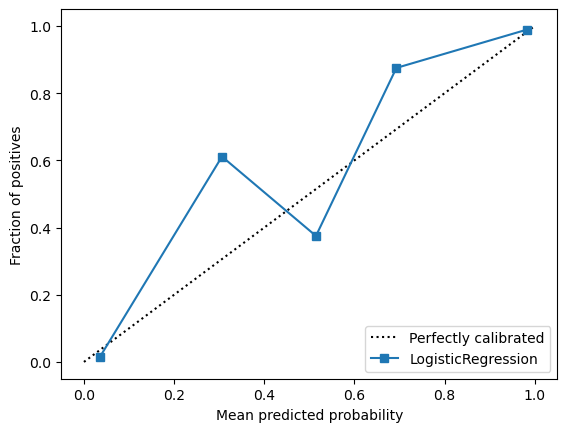

In [9]:
calibration_check(LR, df.drop("id", axis=1), 'diagnosis', 'M')

In [ ]:
df = pd.read_csv('../datasets/fraud_new.csv')
df_titanic = pd.read_csv('../datasets/TitanicClean.csv')
example = df.sample(1)
example_titanic = df_titanic.sample(1)
examples = df.sample(100)
examples = examples.drop('isFraud', axis = 1)

Teste Critical Values

In [ ]:
help(find_critical_values)

Teste Sanity Check

In [ ]:
sanity_check(LR, df, 'isFraud')

In [ ]:
sanity_analysis = sanity_check_with_indexes(LR, df, 'isFraud')
sanity_analysis.metrics

Others analysis

In [ ]:
for c in df_titanic.columns:
    if c != 'isFraud':
        minV = df_titanic[c].min()
        maxV = df_titanic[c].max()
        teste = check_monotonicity(c,minV,maxV,example_titanic, "models/SVM/SVMTitanic.pkl", 150)
        # teste = check_monotonicity(c,minV,maxV,example_titanic, SVM, 150)
    break

In [ ]:
print(teste)
teste.save_graphs()

In [ ]:
print(teste.errors)
print(teste.warnings)
print(teste.metrics)
print(teste.model_info)

In [ ]:
for c in df_titanic.columns:
    if c != 'isFraud':
        minV = 100
        maxV = 100
        find_critical_values(SVM, example_titanic, c, minV, maxV, step = 1000 )

In [ ]:
for c in df.columns:
    if c != 'isFraud':
        minV = df[c].min()
        maxV = df[c].max()
        for model in models:
            teste3 = find_critical_values(model, example, c, minV, maxV )
    break

In [ ]:
for c in df.columns:
    if c != 'isFraud':
        minV = df[c].min()
        maxV = df[c].max()
        for model in models:
            # check_monotonicity(c,minV,maxV,example, model, 150, plot_graph=True)
            check_monotonicity(c,minV,maxV,example, model, 150)

In [ ]:
for model in models:
    teste2 = calibration_check("isFraud", model, df)
    break

In [ ]:
teste2.save_graphs()

In [ ]:
teste2.graphs